In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import MaxNLocator
%matplotlib inline  

In [3]:
raw_data = pd.read_csv("train.csv")

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
raw_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Step 1. Validating and Cleaning data

Text(0.5, 0, 'Lot Frontage (feet)')

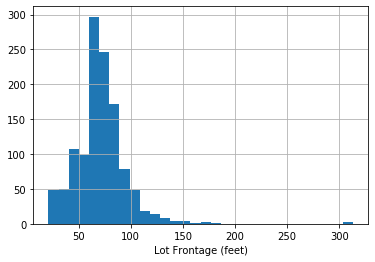

In [7]:
raw_data['LotFrontage'].hist(bins=30)
plt.xlabel("Lot Frontage (feet)")

In [8]:
#Lot Frontage NAs filled with the average value

raw_data['LotFrontage'].fillna(value=raw_data['LotFrontage'].mean(), inplace=True)
raw_data['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

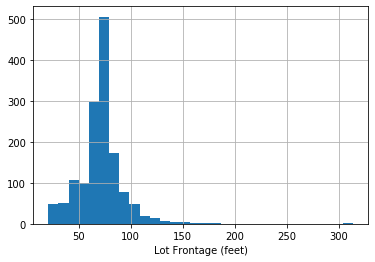

In [9]:
raw_data['LotFrontage'].hist(bins=30)
plt.xlabel("Lot Frontage (feet)");

In [10]:
#in Alley col NA should be replaced by a string that says 'None' because it means there is no alley access
raw_data["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
raw_data["Alley"].fillna(value="None", inplace=True)
raw_data["Alley"].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [12]:
# checking OverallQual and OverallCond -- probably will need to group them, possibly to 3 groups each: poor, average, high

print(raw_data["OverallCond"].value_counts().sort_index())

print(raw_data["OverallQual"].value_counts().sort_index())

1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: OverallCond, dtype: int64
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64


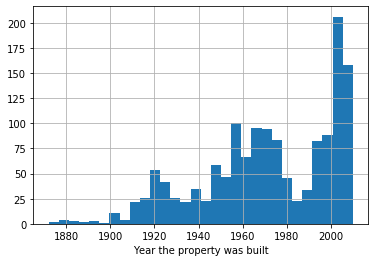

In [13]:
#YearBuilt: should be categorical. Needs grouping according to ranges

raw_data["YearBuilt"].hist(bins=30)
plt.xlabel("Year the property was built");

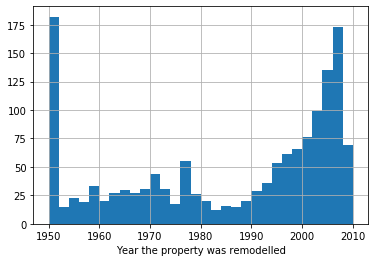

In [14]:
#YearRemodAdd: can be used to create another feature column Remod, which should be 1/0 binary according to the 
#rule YearBuilt==YearRemodAdd then 0 else 1

raw_data["YearRemodAdd"].hist(bins=30)
plt.xlabel("Year the property was remodelled");

In [15]:
# About half the properties in the dataset were remodeled. It would be interesting to see how recent the remodeling was
# referenced to the purchase data

raw_data["Remod"]=0

raw_data.loc[raw_data["YearBuilt"]==raw_data["YearRemodAdd"], "Remod"]=1

raw_data["Remod"].value_counts()

1    764
0    696
Name: Remod, dtype: int64

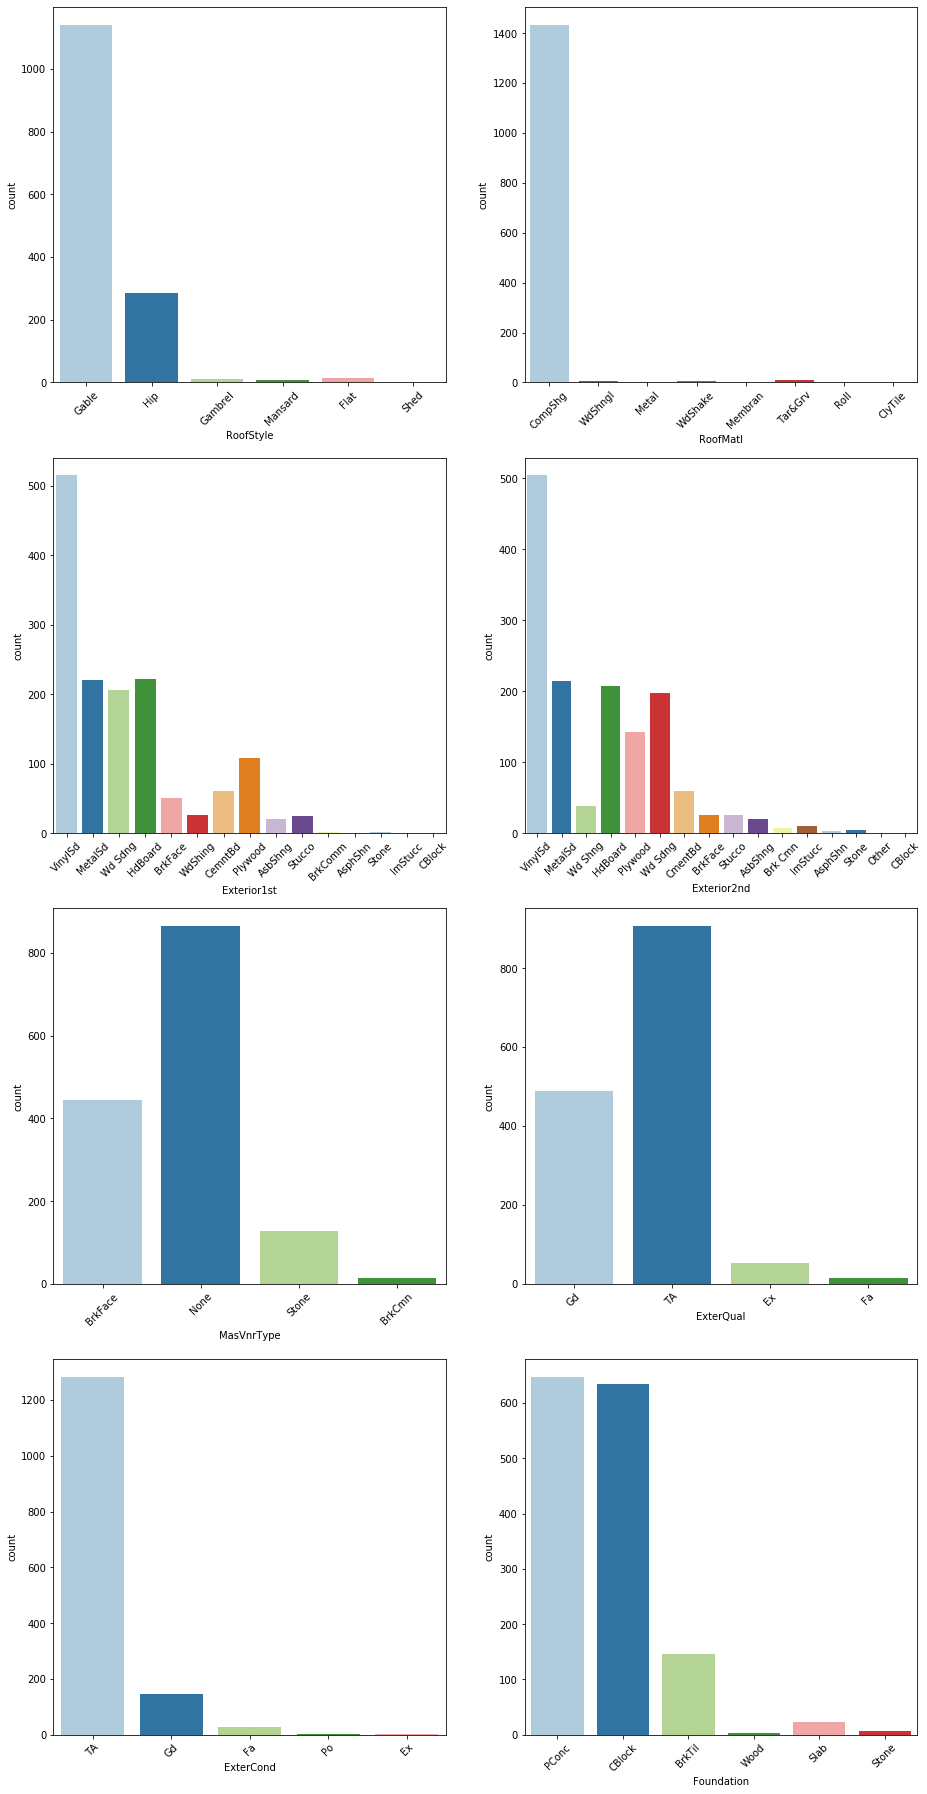

In [16]:
# checking several categorical cols counts for possible groupings

col_list=["RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation"]
if len(col_list)%2==0:
    nrows=len(col_list)//2
else:
    nrows=len(col_list)//2 + 1
    
fig, axes = plt.subplots(nrows,2, figsize=(15,30))
row=0 
col=0
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

for column in col_list:
    
    sns.countplot(x=column, data=raw_data, palette="Paired", ax=axes[row,col])
    axes[row,col].set_xticklabels(axes[row,col].get_xticklabels(), rotation=45)
    
    if col==0:
        col=col+1
        
    else:
        row=row+1
        col=0
        

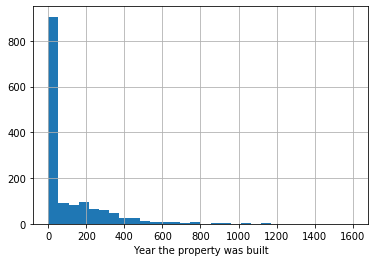

In [17]:
# MasVnrArea have 8 missing values. What does None in MasVnrType correspond to in MasVnrArea ? yes

raw_data["MasVnrArea"].hist(bins=30);
plt.xlabel("Year the property was built");

In [18]:
# will assume the 8 missing values are also corresponding to None and 0.0 in MasVnrType and MasVnrArea.
raw_data["MasVnrType"].fillna(value="None", inplace=True)
raw_data["MasVnrArea"].fillna(value=0.0, inplace=True)

In [23]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [21]:
# compare the CDFs of different 0-10 scale variables

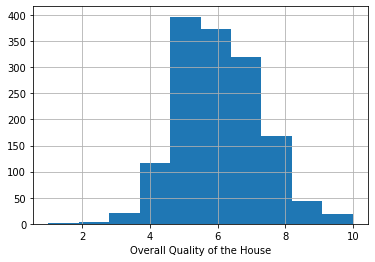

In [47]:
raw_data["OverallQual"].hist();
plt.xlabel("Overall Quality of the House");

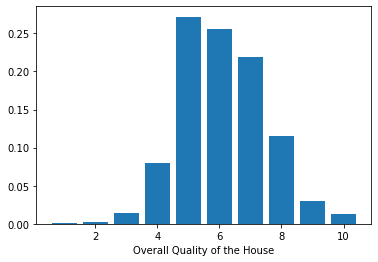

In [50]:
qual = raw_data["OverallQual"]
type(qual)
Pmf.from_seq(qual).bar()
plt.xlabel("Overall Quality of the House");

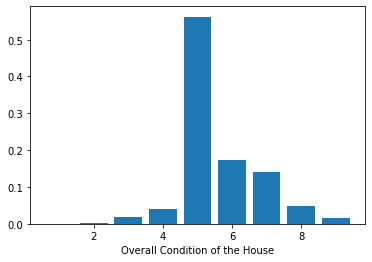

In [51]:
cnd = raw_data["OverallCond"]

Pmf.from_seq(cnd).bar()
plt.xlabel("Overall Condition of the House");

In [22]:
# sns.kdes(data) to estimate a pdf and plot it for a sample

# summary:PMF, CDF, KDE
# 1. Use CDFs for exploration.
# 2. Use PMFs if there are a small number of unique values.
# 3. Use KDE if there are a lot of values.


In [54]:
# check all basement related columns 
basement_cols = [x for x in raw_data.columns if "Bsmt" in x]
raw_data[basement_cols].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,46.549315,567.240411,1057.429452,0.425342,0.057534
std,456.098091,161.319273,441.866955,438.705324,0.518911,0.238753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000
50%,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000
75%,712.250000,0.000000,808.000000,1298.250000,1.000000,0.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,3.000000,2.000000


In [55]:
raw_data[basement_cols].describe(include=["O"])

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
count,1423,1423,1422,1423,1422
unique,4,4,4,6,6
top,TA,TA,No,Unf,Unf
freq,649,1311,953,430,1256


In [60]:
raw_data[basement_cols] = raw_data[basement_cols].fillna('None')

In [61]:
raw_data[basement_cols].describe(include=["O"])

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
count,1460,1460,1460,1460,1460
unique,5,5,5,7,7
top,TA,TA,No,Unf,Unf
freq,649,1311,953,430,1256


In [63]:

# for properties with no basement, null is replace with none in categorical basement columns but the zeros in the numerical
# columns may be replaced by another value, e.g. -1

raw_data.loc[raw_data["BsmtExposure"]=='None', ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", 
                                                "BsmtFullBath", "BsmtHalfBath"]]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,0,0,0,0,0,0
39,0,0,0,0,0,0
90,0,0,0,0,0,0
102,0,0,0,0,0,0
156,0,0,0,0,0,0
182,0,0,0,0,0,0
259,0,0,0,0,0,0
342,0,0,0,0,0,0
362,0,0,0,0,0,0
371,0,0,0,0,0,0


In [71]:
raw_data.at[948,"BsmtExposure"]="No"

In [72]:
raw_data.iloc[948]["BsmtExposure"]

'No'

In [75]:
raw_data.loc[raw_data["BsmtExposure"]=="None", basement_cols].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
count,37.0,37.0,37.0,37.0,37.0,37.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
raw_data.loc[raw_data["BsmtExposure"]=="None", basement_cols].describe(include=['O'])

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
count,37,37,37,37,37
unique,1,1,1,1,1
top,None,None,None,None,None
freq,37,37,37,37,37


In [111]:
# for all the integer columns, plot the PMF

int_cols = [x for x in raw_data.columns if raw_data[x].dtype==np.int64]

int_cols

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Remod']

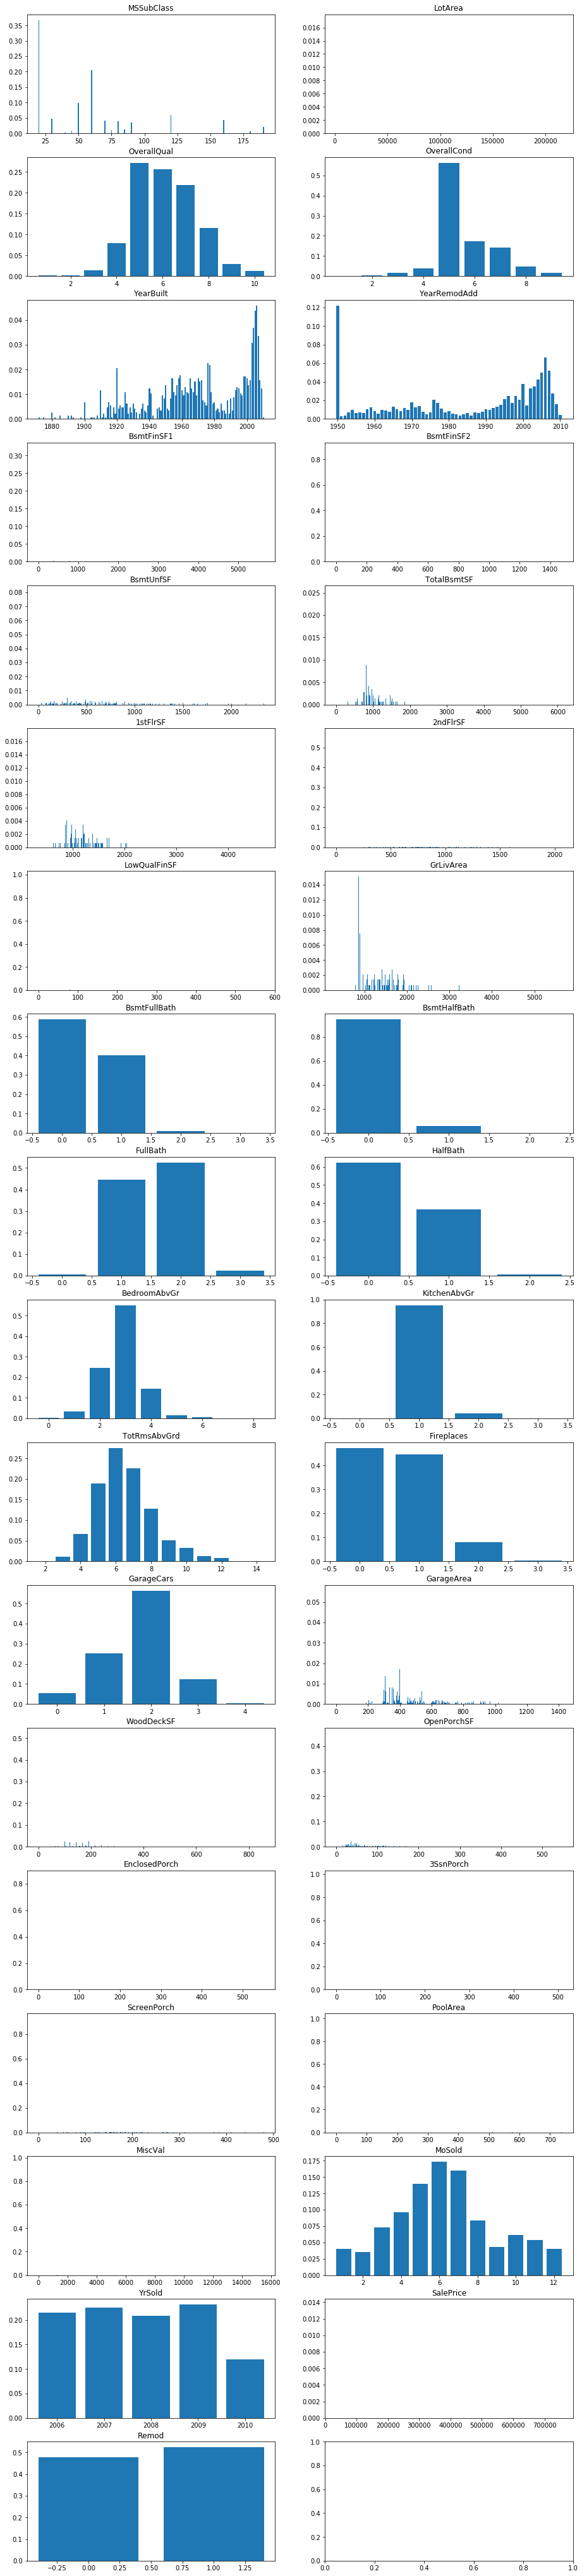

In [107]:
if len(int_cols)%2==0:
    nrows=len(int_cols)//2
else:
    nrows=len(int_cols)//2 + 1
    
fig, axes = plt.subplots(nrows,2, figsize=(15,70))
row=0 
col=0
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

for column in int_cols:
    if column=='Id':
        continue
    pmf = Pmf.from_seq(raw_data[column])
    axes[row,col].bar(pmf.qs, pmf.ps)
    axes[row,col].set_title(column)
    
    
    if col==0:
        col=col+1
        
    else:
        row=row+1
        col=0
     

In [101]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [104]:
raw_data["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [105]:
# one missing value in Electrical, impute it to the most common class. May be worth it to group to SBrkr and NonSBrkr

raw_data["Electrical"]=raw_data["Electrical"].fillna(raw_data["Electrical"].value_counts().index[0])

raw_data["Electrical"].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [112]:
# Replace all categorical data in numerical form to string

to_string_cols = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]

raw_data[to_string_cols] = raw_data[to_string_cols].astype(str)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 

In [143]:
# change int columns that should be float to float
to_float_cols = [x for x in raw_data.columns if ("SF" in x) | ("Area" in x) | ("Porch" in x)]
to_float_cols = to_float_cols+["SalePrice"]+["MiscVal"]
to_float_cols

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'MiscVal']

In [144]:
raw_data[to_float_cols]=raw_data[to_float_cols].astype(np.float64)

In [145]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      146

In [146]:
# change nulls into None in categorical columns

cat_cols = [x for x in raw_data.columns if raw_data[x].dtype==np.object]
cat_cols
raw_data[cat_cols]=raw_data[cat_cols].fillna("None")

In [147]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      146

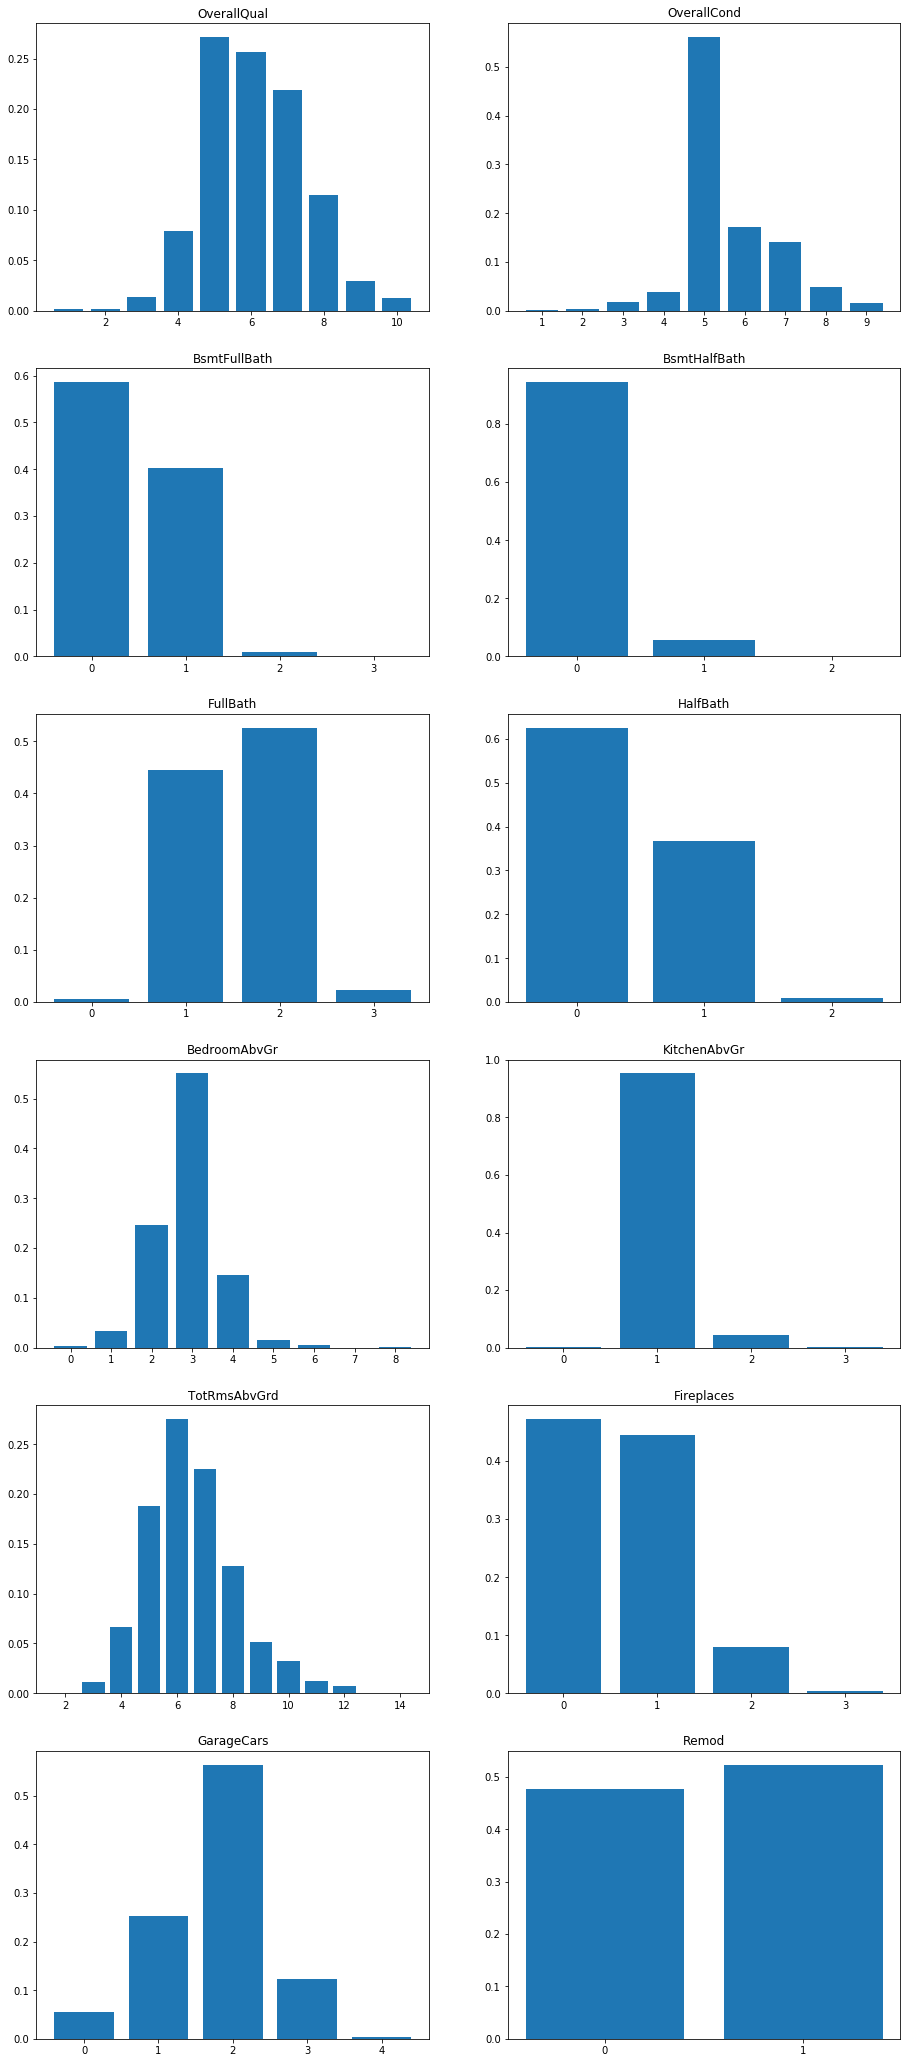

In [156]:
# for all the integer columns, plot the PMF

int_cols = [x for x in raw_data.columns if raw_data[x].dtype==np.int64]
int_cols.remove("Id")

if len(int_cols)%2==0:
    nrows=len(int_cols)//2
else:
    nrows=len(int_cols)//2 + 1
    
fig, axes = plt.subplots(nrows,2, figsize=(15,35))
row=0 
col=0
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

for column in int_cols:
    if column=='Id':
        continue
    pmf = Pmf.from_seq(raw_data[column])
    axes[row,col].bar(pmf.qs, pmf.ps)
    axes[row,col].set_title(column)
    axes[row,col].xaxis.set_major_locator(MaxNLocator(integer=True))
    
    if col==0:
        col=col+1
        
    else:
        row=row+1
        col=0
 



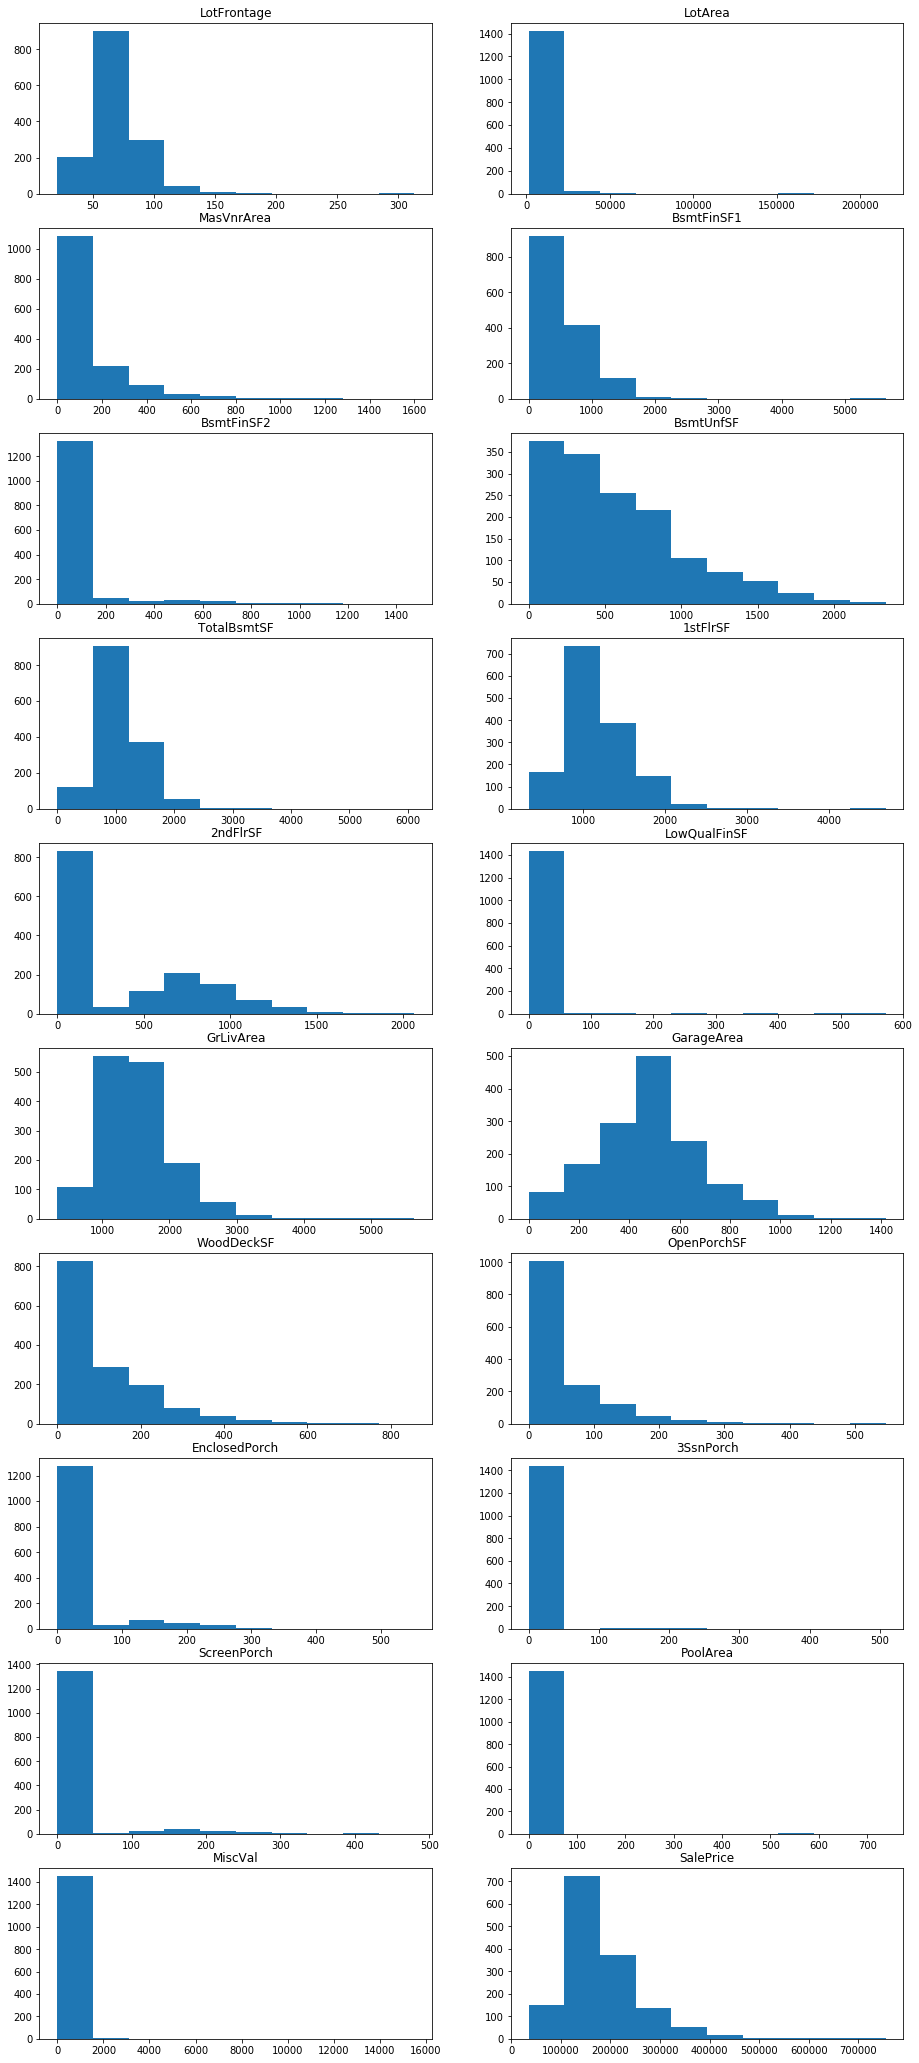

In [157]:
# for all the float columns, plot the distribution

float_cols = [x for x in raw_data.columns if raw_data[x].dtype==np.float64]


if len(float_cols)%2==0:
    nrows=len(float_cols)//2
else:
    nrows=len(float_cols)//2 + 1
    
fig, axes = plt.subplots(nrows,2, figsize=(15,35))
row=0 
col=0
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

for column in float_cols:
    
    axes[row,col].hist(raw_data[column])
    axes[row,col].set_title(column)
   
    
    if col==0:
        col=col+1
        
    else:
        row=row+1
        col=0
 



['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


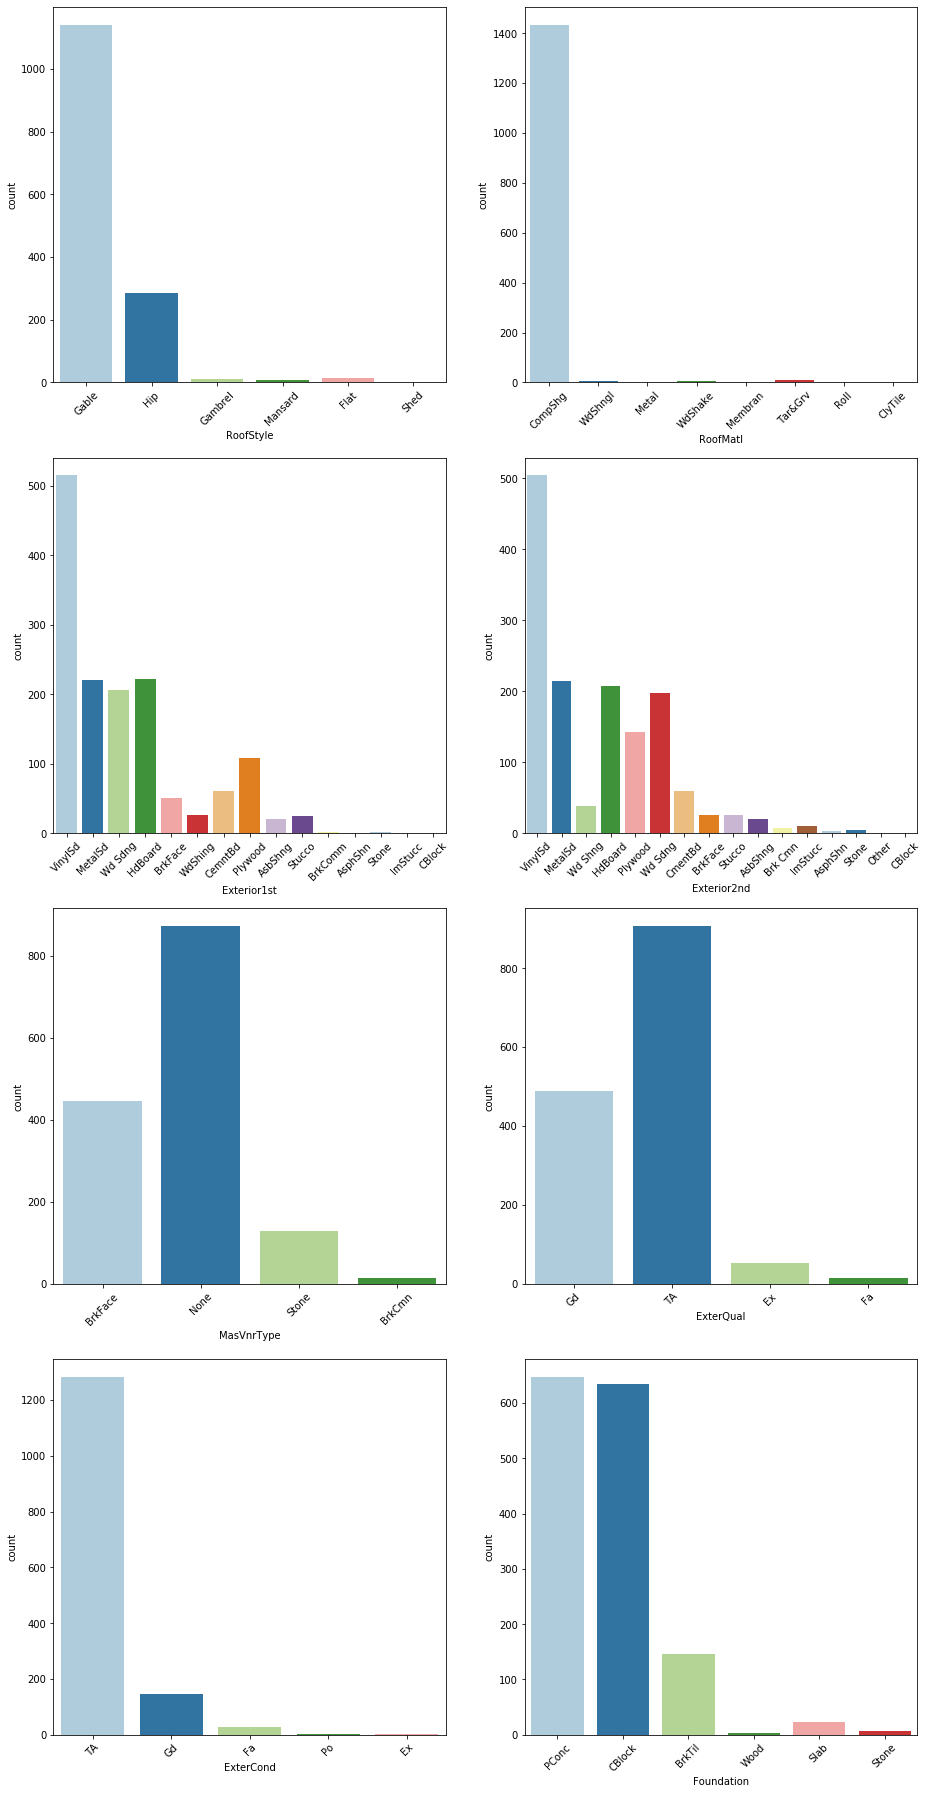

In [158]:
# checking several categorical cols counts for possible groupings

cat_cols= [x for x in raw_data.columns if raw_data[x].dtype==np.object]
print(cat_cols)
if len(col_list)%2==0:
    nrows=len(col_list)//2
else:
    nrows=len(col_list)//2 + 1
    
fig, axes = plt.subplots(nrows,2, figsize=(15,30))
row=0 
col=0
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

for column in col_list:
    
    sns.countplot(x=column, data=raw_data, palette="Paired", ax=axes[row,col])
    axes[row,col].set_xticklabels(axes[row,col].get_xticklabels(), rotation=45)
    
    if col==0:
        col=col+1
        
    else:
        row=row+1
        col=0
        